In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import cPickle as pkl
import keras
import seaborn

from cs231n.classifiers.neural_net import TwoLayerNet
from cs231n.data_utils import get_CIFAR10_data

# Matplotlib settings
%matplotlib inline
# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/
# -->     autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
data = get_CIFAR10_data('../data/cifar10/')

for k, v in data.iteritems():
    print('{}.shape: {}'.format(k, v.shape))

X_val.shape: (1000, 3, 32, 32)
X_train.shape: (49000, 3, 32, 32)
X_test.shape: (1000, 3, 32, 32)
y_val.shape: (1000,)
y_train.shape: (49000,)
y_test.shape: (1000,)


In [3]:
X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']
y_train = data['y_train']
y_val = data['y_val']
y_test = data['y_test']

# Constants
num_classes = 10
num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

# Flatten images
X_train = X_train.reshape(num_train, -1)
X_val = X_val.reshape(num_val, -1)
X_test = X_test.reshape(num_test, -1)

print('X_train.shape =', X_train.shape)
print('X_val.shape =', X_val.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =', y_train.shape)
print('y_val.shape =', y_val.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (49000, 3072)
X_val.shape = (1000, 3072)
X_test.shape = (1000, 3072)
y_train.shape = (49000,)
y_val.shape = (1000,)
y_test.shape = (1000,)


iteration 0/1000: loss 3.602414
iteration 100/1000: loss 2.564026
iteration 200/1000: loss 2.556663
iteration 300/1000: loss 2.458598
iteration 400/1000: loss 2.072051
iteration 500/1000: loss 2.090928
iteration 600/1000: loss 2.113904
iteration 700/1000: loss 1.892986
iteration 800/1000: loss 1.953101
iteration 900/1000: loss 2.060300
train_acc = 0.58, val_acc = 0.46


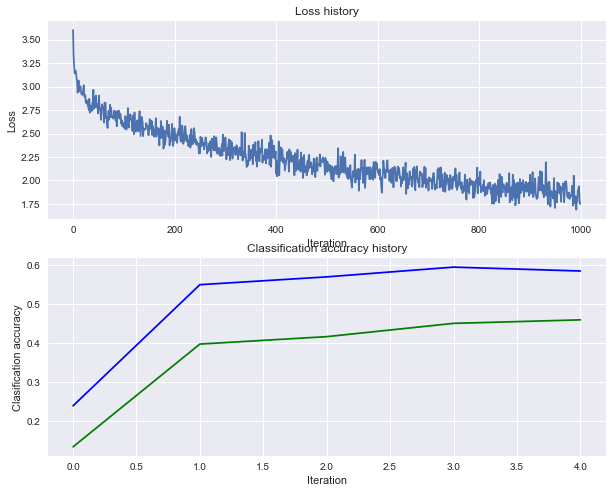

In [4]:
input_dim = 3 * 32 * 32
hidden_dim = 50
std = np.sqrt(2.0 / num_train)
num_iters = 1000
batch_size = 200

lr = 0.00179573608347
decay = 0.960001695353
reg = 0.316227766017

net = TwoLayerNet(input_dim, hidden_dim, num_classes, std)
stats = net.train(X_train, y_train, X_val, y_val,
                  num_iters=num_iters,
                  batch_size=batch_size,
                  learning_rate=lr,
                  learning_rate_decay=decay,
                  reg=reg,
                  verbose=True)

print('train_acc = {:.2f}, val_acc = {:.2f}'.format(
    stats['train_acc_history'][-1], stats['val_acc_history'][-1]))

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train', color='blue')
plt.plot(stats['val_acc_history'], label='val', color='green')
plt.title('Classification accuracy history')
plt.xlabel('Iteration')
plt.ylabel('Clasification accuracy')
plt.show()

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
1s - loss: 31.5932 - acc: 0.1688 - val_loss: 31.7241 - val_acc: 0.1540
Epoch 2/10
1s - loss: 31.2045 - acc: 0.1835 - val_loss: 31.5406 - val_acc: 0.1540
Epoch 3/10
1s - loss: 31.0812 - acc: 0.1871 - val_loss: 31.4510 - val_acc: 0.1580
Epoch 4/10
1s - loss: 31.0028 - acc: 0.1909 - val_loss: 31.3999 - val_acc: 0.1650
Epoch 5/10
1s - loss: 30.9446 - acc: 0.1925 - val_loss: 31.3612 - val_acc: 0.1700
Epoch 6/10
1s - loss: 30.8992 - acc: 0.1944 - val_loss: 31.3285 - val_acc: 0.1700
Epoch 7/10
1s - loss: 30.8626 - acc: 0.1954 - val_loss: 31.2977 - val_acc: 0.1710
Epoch 8/10
1s - loss: 30.8313 - acc: 0.1965 - val_loss: 31.2683 - val_acc: 0.1730
Epoch 9/10
1s - loss: 30.8046 - acc: 0.1980 - val_loss: 31.2457 - val_acc: 0.1760
Epoch 10/10
1s - loss: 30.7816 - acc: 0.1985 - val_loss: 31.2226 - val_acc: 0.1770


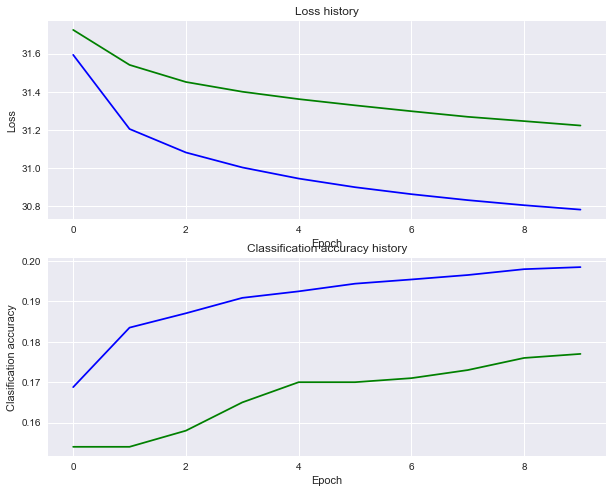

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD

# For tensorflow > 0.9.0 see the issue
# https://github.com/fchollet/keras/issues/3857
# Work around suggested by:
# (al626 commented on 4 Oct 2016)
import tensorflow as tf
tf.python.control_flow_ops = tf


## A fully connected two-layer neural net

input_dim = 3 * 32 * 32
hidden_dim = 50
num_classes = 10
num_epochs = 10
batch_size = 200
init = 'lecun_uniform'

# Found these parameters from cs231n 2-layer model:
reg = 0.316227766017
lr = 0.00179573608347
decay = 0.960001695353

model = Sequential()
model.add(Dense(hidden_dim,
                input_dim=input_dim,
                init=init,
                W_regularizer=l2(reg),
                activation='relu'))
model.add(Dense(num_classes,
                init=init,
                W_regularizer=l2(reg),
                activation='softmax'))

optimizer = SGD(lr=lr, decay=decay)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
res = model.fit(X_train, y_train,
                validation_data=(X_val, y_val),
                nb_epoch=num_epochs,
                batch_size=batch_size,
                verbose=2)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(res.history['loss'], label='train', color='blue')
plt.plot(res.history['val_loss'], label='val', color='green')
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(res.history['acc'], label='train', color='blue')
plt.plot(res.history['val_acc'], label='val', color='green')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()


## Question??!

I don't understand what is the difference between my implementation for the cs231n assignments, and the keras implementation. I am using the same architecture, hyperparameters and data! A small difference is understandable. But here, the validation accuracy numbers are widely different (mine ~46% to keras ~18%). Mine is faster too compared to the keras implementation.

Any idea?!